In [27]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt




# Fetching the MNIST dataset
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist["data"], mnist["target"]

# Setting aside 10% of the data
X_sample, _, y_sample, _ = train_test_split(X, y, test_size=0.9, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X_sample, y_sample, test_size=0.2, random_state=42)

# Scaling the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
X_test_scaled = scaler.transform(X_test.astype(np.float64))

import warnings
warnings.filterwarnings('ignore')

## Showing digits

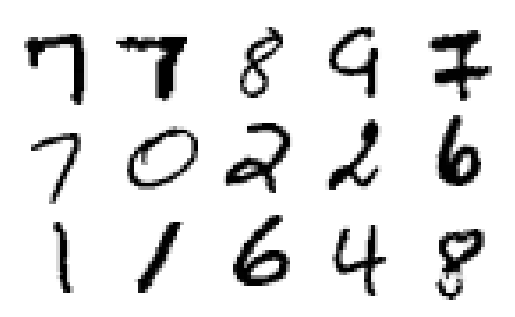

In [28]:
# Load MNIST data from OpenML
X = np.array(X_train).reshape(-1, 28, 28)  # Reshape the data to 28x28 images
def plot_digits(instances, images_per_row=5, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    instances = np.concatenate([instances, np.zeros((n_empty, size, size))], axis=0)
    for row in range(n_rows):
        rimages = instances[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap=plt.cm.binary, **options)
    plt.axis("off")

# Choose how many digits you want to display
n_digits = 15
plot_digits(X[:n_digits], images_per_row=5)
plt.show()

# Fitting a method

In [37]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train_scaled, y_train)

DecisionTreeClassifier(random_state=42)

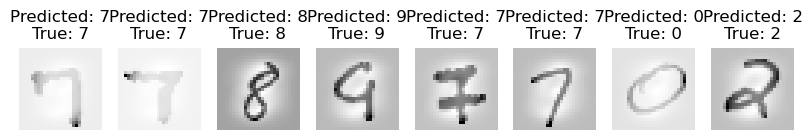

In [38]:
predictions = dt_clf.predict(X_train_scaled[:16])
fig, axes = plt.subplots(1, 8, figsize=(10, 2))  # Adjust the figure size as needed
for i, ax in enumerate(axes):
    ax.imshow(X_train_scaled[i].reshape(28, 28), cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(f"Predicted: {predictions[i]}\nTrue: {y_train.iloc[i]}")
    ax.axis('off')
plt.show()

In [39]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=10,random_state=42)
rf_clf.fit(X_train_scaled, y_train)

RandomForestClassifier(n_estimators=10, random_state=42)

In [40]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(multi_class="multinomial", solver="lbfgs", max_iter=100, random_state=42)
log_reg.fit(X_train_scaled, y_train)

LogisticRegression(multi_class='multinomial', random_state=42)

In [5]:
from sklearn.neural_network import MLPClassifier

mlp_clf = MLPClassifier(random_state=42)
mlp_clf.fit(X_train_scaled, y_train)
# mlp_predictions = mlp_clf.predict(X_test_scaled)
# print("MLP Classifier Accuracy:", accuracy_score(y_test, mlp_predictions))

MLP Classifier Accuracy: 0.9371428571428572


In [6]:
from sklearn.svm import SVC

svm_clf = SVC()
svm_clf.fit(X_train_scaled, y_train)
# svm_predictions = svm_clf.predict(X_test_scaled)
# print("SVM Accuracy:", accuracy_score(y_test, svm_predictions))

SVM Accuracy: 0.9342857142857143


<div style="background-color: orange; color: black; padding: 10px;">
Is this what we want? 
No, we want to perform well on points we have not seen during training !!

--> Test data
</div>

## Getting Test accuracy

In [2]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train_scaled, y_train)
dt_predictions = dt_clf.predict(X_test_scaled)
print("Decision Tree Accuracy:", accuracy_score(y_test, dt_predictions))

Decision Tree Accuracy: 0.7771428571428571


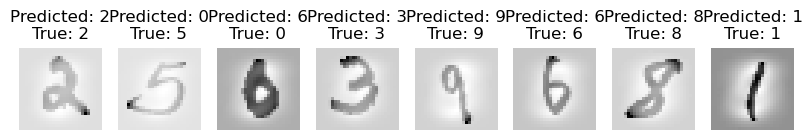

In [36]:
predictions = dt_clf.predict(X_test_scaled[:16])
fig, axes = plt.subplots(1, 8, figsize=(10, 2))  # Adjust the figure size as needed
for i, ax in enumerate(axes):
    ax.imshow(X_test_scaled[i].reshape(28, 28), cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(f"Predicted: {predictions[i]}\nTrue: {y_test.iloc[i]}")
    ax.axis('off')
plt.show()

In [3]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=10,random_state=42)
rf_clf.fit(X_train_scaled, y_train)
rf_predictions = rf_clf.predict(X_test_scaled)
print("Random Forest Accuracy:", accuracy_score(y_test, rf_predictions))

Random Forest Accuracy: 0.8921428571428571


In [4]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(multi_class="multinomial", solver="lbfgs", max_iter=100, random_state=42)
log_reg.fit(X_train_scaled, y_train)
log_predictions = log_reg.predict(X_test_scaled)
print("Logistic Regression Accuracy:", accuracy_score(y_test, log_predictions))

Logistic Regression Accuracy: 0.8907142857142857


/Users/aymericdieuleveut/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [5]:
from sklearn.neural_network import MLPClassifier

mlp_clf = MLPClassifier(random_state=42)
mlp_clf.fit(X_train_scaled, y_train)
mlp_predictions = mlp_clf.predict(X_test_scaled)
print("MLP Classifier Accuracy:", accuracy_score(y_test, mlp_predictions))

MLP Classifier Accuracy: 0.9371428571428572


In [6]:
from sklearn.svm import SVC

svm_clf = SVC()
svm_clf.fit(X_train_scaled, y_train)
svm_predictions = svm_clf.predict(X_test_scaled)
print("SVM Accuracy:", accuracy_score(y_test, svm_predictions))

SVM Accuracy: 0.9342857142857143


## Cross Validation

In [9]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

In [7]:
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=10,random_state=42),
    "Logistic Regression": LogisticRegression(multi_class="multinomial", solver="lbfgs", max_iter=100, random_state=42),
    "MLP Classifier": MLPClassifier(random_state=42),
    "SVM": SVC()
}

In [12]:
cv_results = {}

for name, model in models.items():
    kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    cv_score = cross_val_score(model, X_train, y_train, cv=kfold, scoring="accuracy")
    cv_results[name] = cv_score
    print(f"{name}: Mean CV accuracy={np.mean(cv_score)}, Std Deviation={np.std(cv_score)}")

Decision Tree: Mean CV accuracy=0.77125, Std Deviation=0.013163512495701512
Random Forest: Mean CV accuracy=0.8826785714285714, Std Deviation=0.008957097288560329
Logistic Regression: Mean CV accuracy=0.875, Std Deviation=0.007804204779790029
MLP Classifier: Mean CV accuracy=0.8842857142857143, Std Deviation=0.0031237242293813998
SVM: Mean CV accuracy=0.9505357142857143, Std Deviation=0.005463235193135154


In [18]:
# Convert results to DataFrame for better visualization
results_df = pd.DataFrame(cv_results)
results_df

,Decision Tree,Random Forest,Logistic Regression,MLP Classifier,SVM
0,0.775893,0.885714,0.880357,0.885714,0.953571
1,0.752679,0.875000,0.866071,0.882143,0.942857
2,0.776786,0.898214,0.883929,0.885714,0.958929
3,0.790179,0.881250,0.865179,0.888393,0.950000
4,0.760714,0.873214,0.879464,0.879464,0.947321


In [17]:
# Descriptive statistics can also be helpful
results_df.describe()

,Decision Tree,Random Forest,Logistic Regression,MLP Classifier,SVM
count,5.000000,5.000000,5.000000,5.000000,5.000000
mean,0.771250,0.882679,0.875000,0.884286,0.950536
std,0.014717,0.010014,0.008725,0.003492,0.006108
min,0.752679,0.873214,0.865179,0.879464,0.942857
25%,0.760714,0.875000,0.866071,0.882143,0.947321
50%,0.775893,0.881250,0.879464,0.885714,0.950000
75%,0.776786,0.885714,0.880357,0.885714,0.953571
max,0.790179,0.898214,0.883929,0.888393,0.958929


## Leveraging grid search CV


In [ ]:
from sklearn.model_selection import GridSearchCV

# Example for SVM
param_grid = {
    'C': [1, 10, 100],
    'gamma': [0.001, 0.01, 0.1],
}
grid_search = GridSearchCV(SVC(), param_grid, cv=3, verbose=2)
grid_search.fit(X_train_scaled[:10000], y_train[:10000])  # Reduced data size for quicker execution

print("Best parameters:", grid_search.best_params_)
print("Best cross-validation accuracy:", grid_search.best_score_)
best_model = grid_search.best_estimator_
final_predictions = best_model.predict(X_test_scaled)
print("Test set accuracy:", accuracy_score(y_test, final_predictions))

In [43]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,2.354261,0.049712,1.981289,0.027614,1,0.001,"{'C': 1, 'gamma': 0.001}",0.918050,0.930370,0.927653,0.925358,0.005285,3
1,7.614626,0.022478,2.995119,0.006781,1,0.01,"{'C': 1, 'gamma': 0.01}",0.693626,0.718800,0.724009,0.712145,0.013266,6
2,8.525636,0.034385,3.381043,0.004120,1,0.1,"{'C': 1, 'gamma': 0.1}",0.175147,0.187467,0.181136,0.181250,0.005030,9
3,1.957532,0.022052,1.767812,0.001655,10,0.001,"{'C': 10, 'gamma': 0.001}",0.928227,0.933048,0.937835,0.933037,0.003922,2
4,7.731749,0.122276,3.002695,0.004842,10,0.01,"{'C': 10, 'gamma': 0.01}",0.708623,0.735404,0.746517,0.730181,0.015905,4
5,8.540356,0.023448,3.378721,0.004322,10,0.1,"{'C': 10, 'gamma': 0.1}",0.176219,0.187467,0.184887,0.182858,0.004811,7
6,1.959067,0.025085,1.774580,0.014967,100,0.001,"{'C': 100, 'gamma': 0.001}",0.928763,0.933048,0.937835,0.933215,0.003706,1
7,7.861557,0.143017,3.017998,0.025798,100,0.01,"{'C': 100, 'gamma': 0.01}",0.708623,0.735404,0.746517,0.730181,0.015905,4
8,8.649604,0.021181,3.455342,0.009529,100,0.1,"{'C': 100, 'gamma': 0.1}",0.176219,0.187467,0.184887,0.182858,0.004811,7
